In [2]:
import pandas as pd

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv(r"C:\Users\Venky.DESKTOP-GRS8ME6\Downloads\datasets\alien datasets\scrubbed.csv",low_memory=False)

In [25]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [5]:
# alien1 = pd.read_csv(r"C:\Users\Venky.DESKTOP-GRS8ME6\Downloads\datasets\alien datasets\Complete.csv",  error_bad_lines=False)

In [26]:
data.shape

(80332, 11)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [28]:
df = data.copy()

In [29]:
df[df.duplicated()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude


In [30]:
df.nunique()

datetime                69586
city                    19900
state                      67
country                     5
shape                      29
duration (seconds)        537
duration (hours/min)     8349
comments                79997
date posted               317
latitude                18445
longitude               19455
dtype: int64

In [31]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,80332,69586,7/4/2010 22:00,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,80332,19900,seattle,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,74535,67,ca,9655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,70662,5,us,65114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shape,78400,29,light,16565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration (seconds),80332,537,300,8635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration (hours/min),80332,8349,5 minutes,4716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comments,80317,79997,Fireball,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date posted,80332,317,12/12/2009,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,80332,18445,47.6063889,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.country.value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [34]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

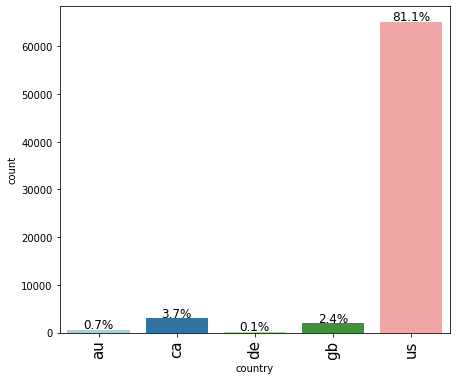

In [35]:
labeled_barplot(df, 'country', perc = True)

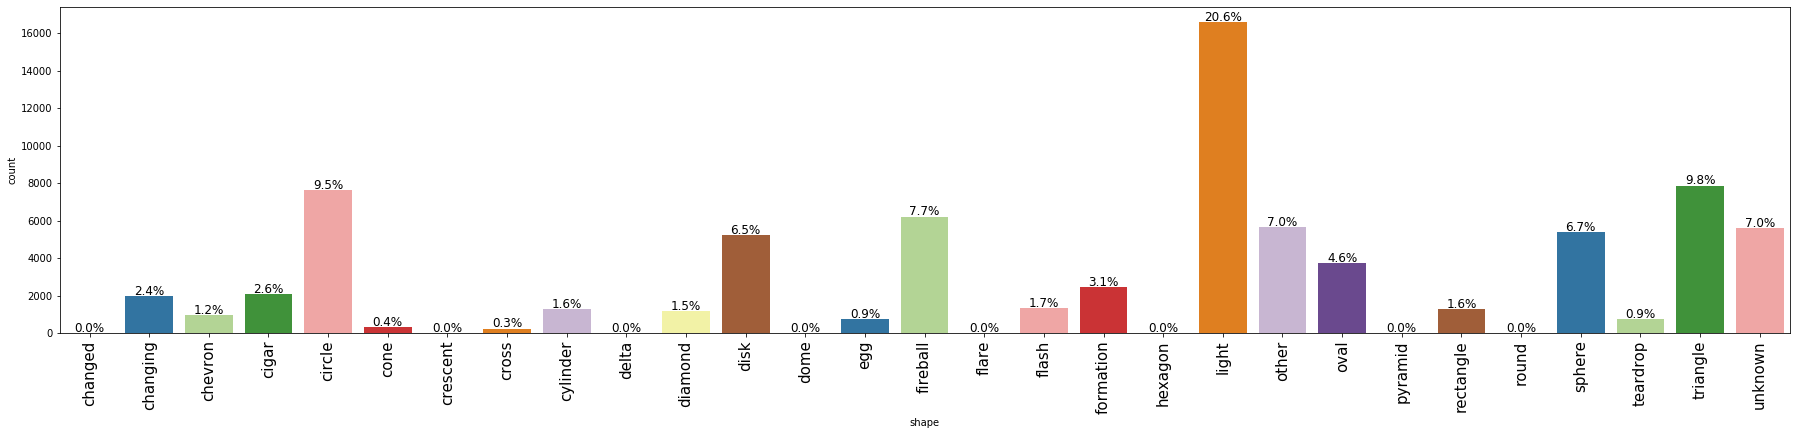

In [36]:
labeled_barplot(df, 'shape', perc = True)

In [48]:
df.isna().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64